## 2. Dataset Titanic

Nuevamente, vamos a trabajar con el dataset del Titanic. La consigna consiste en:

1. Generar dos casos benchmark (prueba de rendimiento o comparativa) para este dataset. ¿Cuáles se te ocurren? Hay una pista en el notebook anterior.
1. Encontrar los mejores parámetros para profundidad y número de vecinos para un modelo de árbol de decisión y kNN, respectivamente. No te olvides de agregar un `train_test_split`, predecir sobre `X_train` y `X_test` y evaluar el desempeño de los modelos sobre esos conjuntos. 
1. Evaluar precisión, exhaustividad y F-Score para los modelos con los mejores hiperparámetros. Existen varias funciones de Scikit-Learn que puedes usar. Puedes consultar la información [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). Es importante que leas **detalladamente** la documentación de la función que elijas.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data\DS_Bitácora_12_Titanic.csv')

In [3]:
X = df[["Pclass", "Sex"]]
y = df[["Survived"]]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train, np.ravel(y_train))
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_true = y_train, y_pred = y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_true = y_test, y_pred = y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Accuracy')

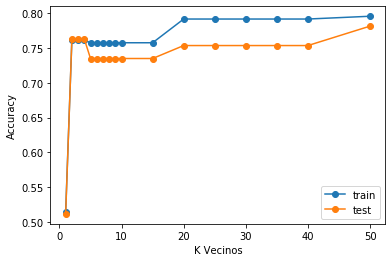

In [6]:
plt.plot(k_vecinos, lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos, lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel("K Vecinos")
plt.ylabel("Accuracy")

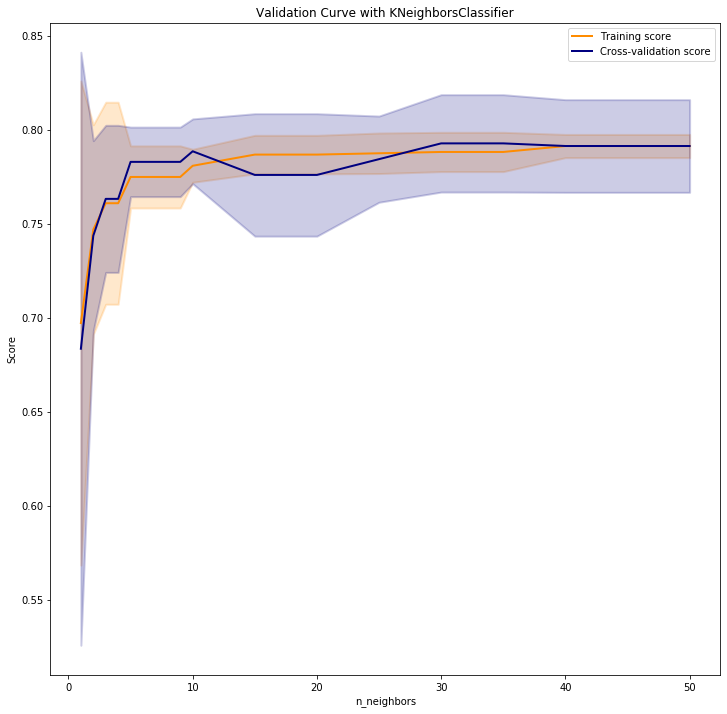

In [7]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X, np.ravel(y), param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(12,12));
plt.title("Validation Curve with KNeighborsClassifier")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()